### Logistic Regression, Random Forest, Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

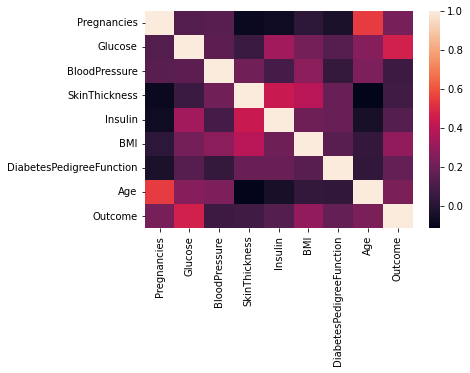

In [3]:
sns.heatmap(df.corr())

In [4]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [6]:
# 1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)
print(f"Logistic Regression training set accuracy: {format(logmodel.score(x_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set accuracy: {format(logmodel.score(x_test, y_test), '.4f')} ")

Logistic Regression training set accuracy: 0.7821 
Logistic Regression testing set accuracy: 0.7835 


In [8]:
predictions = logmodel.predict(x_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[132,  18],
       [ 32,  49]], dtype=int64)

In [11]:
# 2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest = RandomForestClassifier(max_depth=5, n_estimators=100)
forest.fit(x_train, y_train)
print(f"Random forest training set accuracy: {format(forest.score(x_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(x_test, y_test), '.4f')} ")

Random forest training set accuracy: 0.8603 
Random forest testing set accuracy: 0.7706 


In [14]:
predictions = forest.predict(x_test)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [16]:
confusion_matrix(y_test,predictions)

array([[132,  18],
       [ 35,  46]], dtype=int64)

In [17]:
# 3. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [19]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']
x = df[feature_cols]
y = df.Outcome

In [20]:
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 101)
classifier = classifier.fit(x_train, y_train)
print(f"Decision Tree training set accuracy: {format(classifier.score(x_train, y_train), '.4f')} ")
print(f"Decision Tree testing set accuracy: {format(classifier.score(x_test, y_test), '.4f')} ")

Decision Tree training set accuracy: 0.8361 
Decision Tree testing set accuracy: 0.7273 


In [21]:
predictions = classifier.predict(x_test)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       150
           1       0.59      0.75      0.66        81

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.73      0.73       231



In [23]:
confusion_matrix(y_test,predictions)

array([[107,  43],
       [ 20,  61]], dtype=int64)

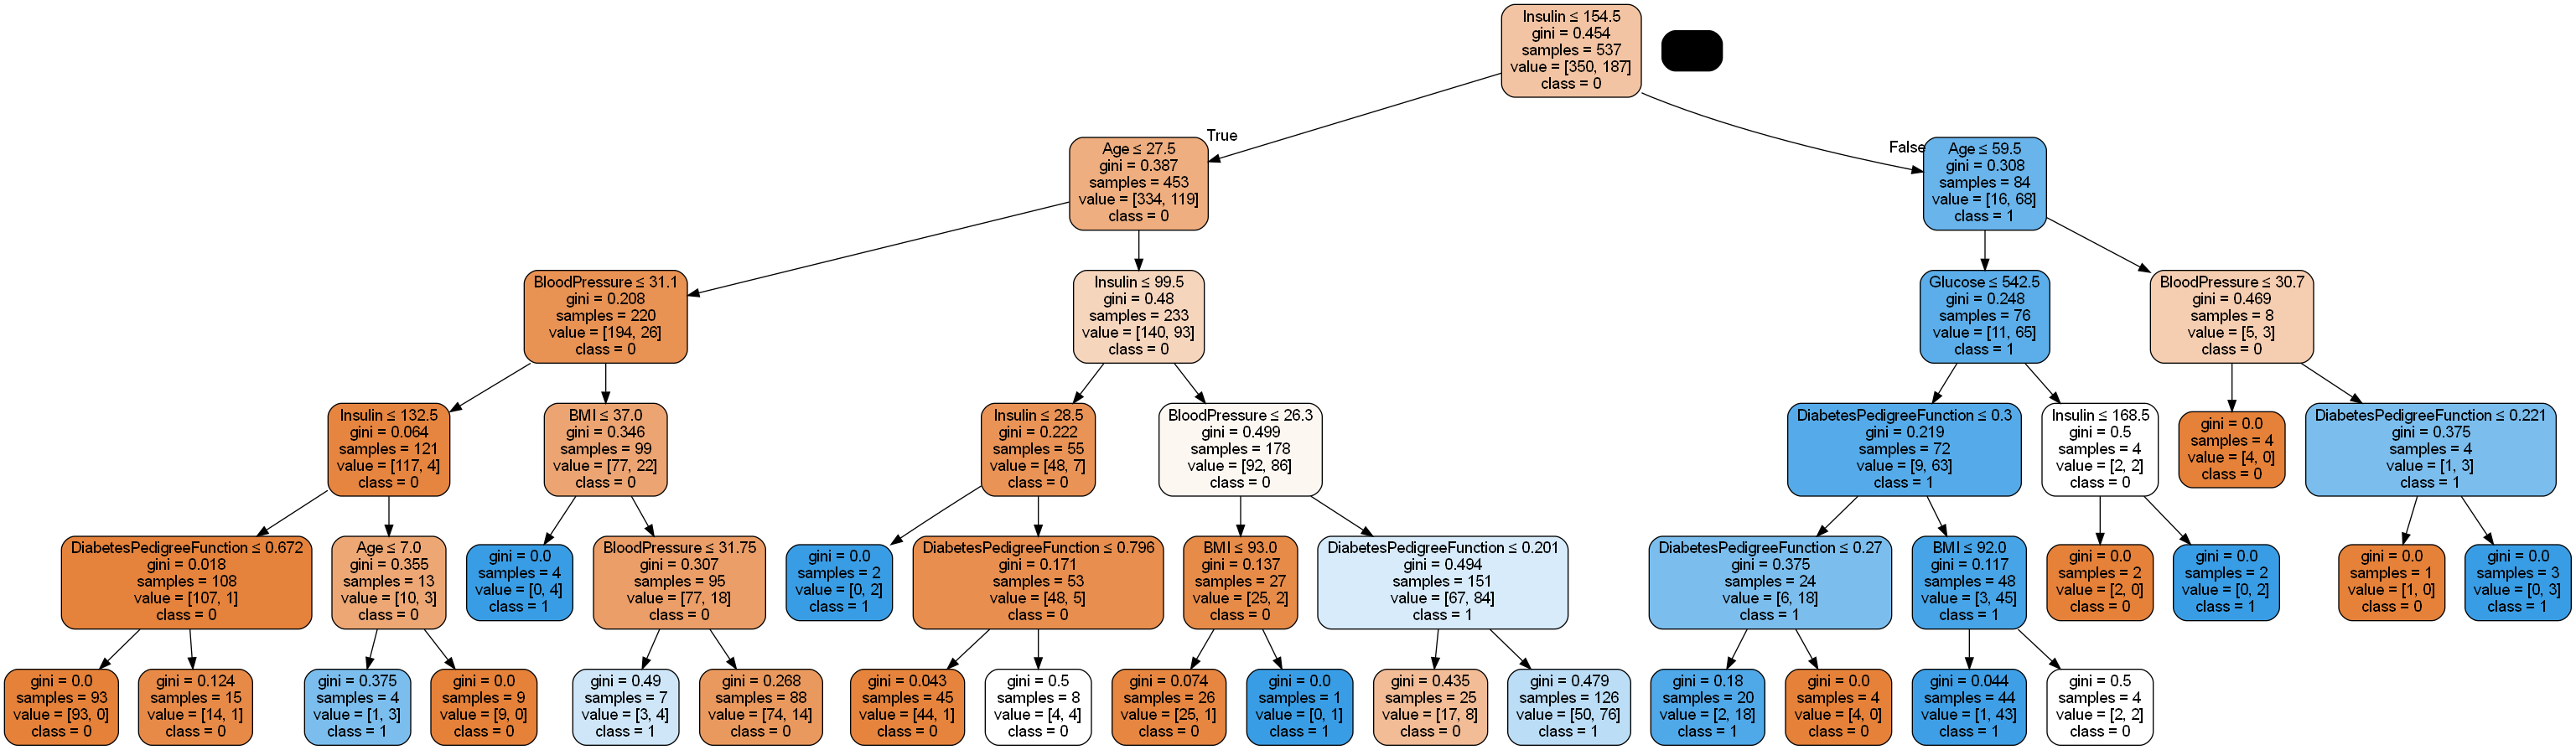

In [24]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())